In [218]:
pip install umap-learn

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import umap.umap_ as umap

In [220]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [221]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/Beach_Water_Quality_-_Automated_Sensors - Copy.csv")

In [222]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Status
count,40702.000000,40702.000000,10034.000000,40475.000000,40475.000000,40702.000000,40702.000000
mean,19.552344,4.698490,1.570235,-1608.228589,-1604.581248,11.057012,0.000246
std,3.390735,31.790328,0.175118,12580.044110,12580.511564,0.758384,0.015673
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,0.000000,0.000000
25%,17.200000,0.710000,1.426000,0.111000,3.000000,10.600000,0.000000
50%,19.800000,1.280000,1.578000,0.156000,3.000000,11.100000,0.000000
75%,22.300000,2.480000,1.721000,0.203000,4.000000,11.500000,0.000000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000,1.000000


## Data Cleaning

In [223]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                         0
Measurement Timestamp              0
Water Temperature                  0
Turbidity                          0
Transducer Depth               30668
Wave Height                      227
Wave Period                      227
Battery Life                       0
Measurement Timestamp Label        0
Measurement ID                     0
Status                             0
dtype: int64


In [224]:
# transducer column has many null values, so dropping it
data.drop(columns='Transducer Depth',inplace=True)

In [225]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
40697    False
40698    False
40699    False
40700    False
40701    False
Length: 40702, dtype: bool

In [226]:
data = data.rename(columns={'Measurement Timestamp':'Measurement_Timestamp_Org'})

data['Measurement_Timestamp_Org'] = pd.to_datetime(data['Measurement_Timestamp_Org'])

In [227]:
data.head()

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Status
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0,4/7/2018 0:30,CalumetBeach201804072430,0
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8,6/14/2019 19:00,OhioStreetBeach201906141900,0
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3,5/16/2018 13:00,OhioStreetBeach201805161300,0
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3,5/16/2018 14:00,OhioStreetBeach201805161400,0
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4,6/4/2018 9:00,OhioStreetBeach201806040900,0


In [228]:
data.set_index('Measurement_Timestamp_Org')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Status
Measurement_Timestamp_Org,,,,,,,,,
2018-04-07 00:30:00,Calumet Beach,21.7,3.15,0.389,3.0,0.0,4/7/2018 0:30,CalumetBeach201804072430,0
2019-06-14 19:00:00,Ohio Street Beach,16.0,2.18,0.137,3.0,11.8,6/14/2019 19:00,OhioStreetBeach201906141900,0
2018-05-16 13:00:00,Ohio Street Beach,21.7,1.92,0.023,1.0,10.3,5/16/2018 13:00,OhioStreetBeach201805161300,0
2018-05-16 14:00:00,Ohio Street Beach,21.9,1.81,0.026,6.0,10.3,5/16/2018 14:00,OhioStreetBeach201805161400,0
2018-06-04 09:00:00,Ohio Street Beach,23.0,0.03,0.021,8.0,12.4,6/4/2018 9:00,OhioStreetBeach201806040900,0
...,...,...,...,...,...,...,...,...,...
2015-08-24 21:00:00,63rd Street Beach,14.5,0.42,0.169,3.0,11.4,8/24/2015 21:00,63rdStreetBeach201508242100,1
2015-08-24 22:00:00,63rd Street Beach,14.6,0.46,0.198,3.0,11.4,8/24/2015 22:00,63rdStreetBeach201508242200,1
2015-08-24 23:00:00,63rd Street Beach,14.6,0.51,0.175,6.0,11.4,8/24/2015 23:00,63rdStreetBeach201508242300,1


In [229]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement_Timestamp_Org'])

True

In [230]:
data.columns

Index(['Beach Name', 'Measurement_Timestamp_Org', 'Water Temperature',
       'Turbidity', 'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID', 'Status'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns: 'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

### Ouliers Detection

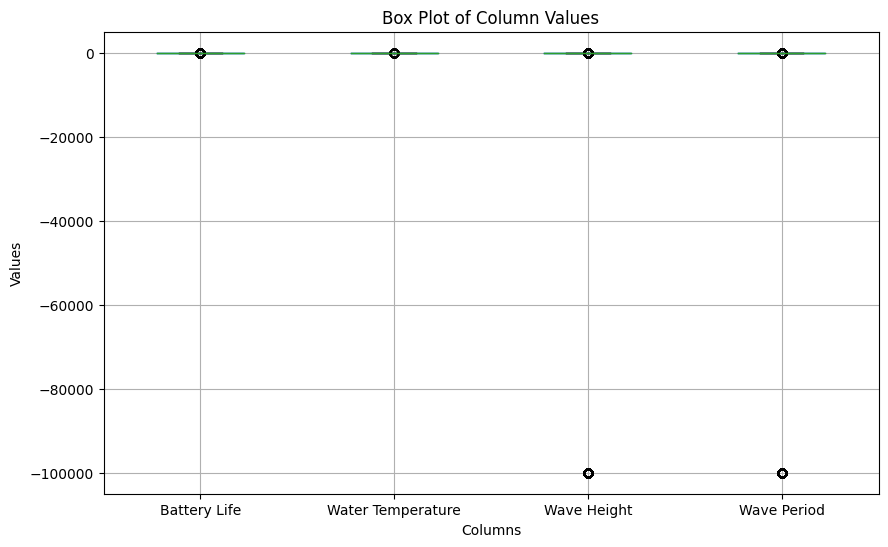

In [231]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [232]:
# data = data.drop(data.loc[data['Wave Height']<-999,:].index)

### Dropping unwanted columns
Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [233]:
data = data.drop(columns=['Measurement Timestamp Label','Measurement ID','Status'])

In [234]:
data_sorted = data.sort_values(by=['Beach Name','Measurement_Timestamp_Org'])

In [235]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
3153,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0
3154,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2
3155,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2
3156,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2
3157,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1
...,...,...,...,...,...,...,...
40684,Rainbow Beach,2015-10-01 03:00:00,16.2,21.96,-99999.992,-100000.0,5.3
40685,Rainbow Beach,2015-10-01 04:00:00,15.8,0.15,-99999.992,-100000.0,10.4
40686,Rainbow Beach,2015-10-01 05:00:00,15.9,8.59,-99999.992,-100000.0,5.7
40687,Rainbow Beach,2015-10-01 06:00:00,15.8,357.35,-99999.992,-100000.0,10.4


In [236]:
data_sorted['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

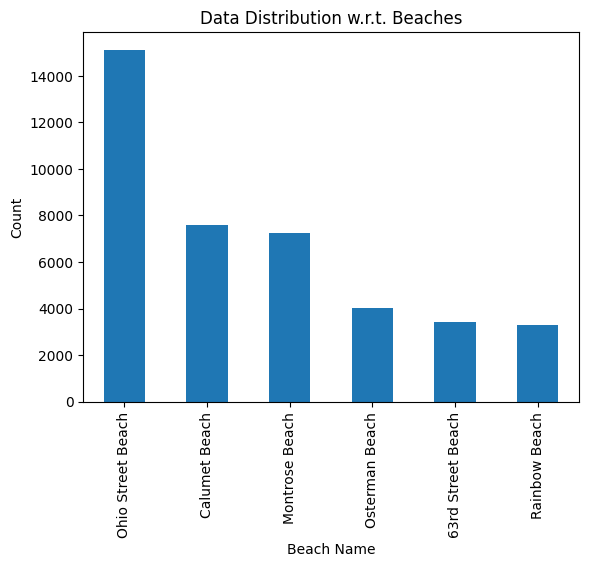

In [237]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [238]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Umap_Data_Manipulation/data_sorted.csv")

### Label Encoding
Performing label encoding to convert categorical data in Beach Name column to numeric

In [239]:
lblEn = LabelEncoder()

data_sorted['Beach Name'] =lblEn.fit_transform(data_sorted['Beach Name'])

In [240]:
lblEn.inverse_transform(np.array([0, 1, 2, 3]))
# lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted['Beach Name'].uni que()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach'], dtype=object)

In [241]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [242]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
3153,0,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0
3154,0,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2
3155,0,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2
3156,0,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2
3157,0,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1
...,...,...,...,...,...,...,...
40684,5,2015-10-01 03:00:00,16.2,21.96,-99999.992,-100000.0,5.3
40685,5,2015-10-01 04:00:00,15.8,0.15,-99999.992,-100000.0,10.4
40686,5,2015-10-01 05:00:00,15.9,8.59,-99999.992,-100000.0,5.7
40687,5,2015-10-01 06:00:00,15.8,357.35,-99999.992,-100000.0,10.4


### Standardizing the numeric columns

In [243]:
scaler = StandardScaler()
data_sorted[num_cols] = scaler.fit_transform(data_sorted[num_cols])

In [244]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
3153,0,2013-09-18 10:00:00,-0.192392,0.090013,0.127852,0.127865,-0.075177
3154,0,2014-06-12 12:00:00,1.724619,-0.039273,0.127844,0.128262,1.507155
3155,0,2014-06-12 13:00:00,-0.428332,-0.043677,0.127868,0.128341,1.507155
3156,0,2014-06-12 14:00:00,-0.605287,-0.055631,0.127852,0.127865,1.507155
3157,0,2014-06-12 15:00:00,-0.664272,-0.077965,0.127853,0.127865,1.375294
...,...,...,...,...,...,...,...
40684,5,2015-10-01 03:00:00,-0.988690,0.542987,-7.821354,-7.821354,-7.591253
40685,5,2015-10-01 04:00:00,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342
40686,5,2015-10-01 05:00:00,-1.077167,0.122413,-7.821354,-7.821354,-7.063809
40687,5,2015-10-01 06:00:00,-1.106660,11.093180,-7.821354,-7.821354,-0.866342


In [245]:
data_sorted.isna().sum()

Beach Name                     0
Measurement_Timestamp_Org      0
Water Temperature              0
Turbidity                      0
Wave Height                  227
Wave Period                  227
Battery Life                   0
dtype: int64

### Converting the timestamp to numerical values

In [246]:
# data_sorted['Measurement Timestamp'] = data_sorted['Measurement Timestamp'].apply(lambda x: x.timestamp())
data_sorted['Measurement Timestamp'] = data_sorted['Measurement_Timestamp_Org'].apply(lambda x: x.timestamp())

In [247]:
measurement_timestamp_org_df = data_sorted['Measurement_Timestamp_Org']
data_sorted = data_sorted.drop('Measurement_Timestamp_Org',axis=1)

In [248]:
data_sorted.isna().sum()

Beach Name                 0
Water Temperature          0
Turbidity                  0
Wave Height              227
Wave Period              227
Battery Life               0
Measurement Timestamp      0
dtype: int64

### Processing Null values
There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [249]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

# data_sorted=pd.DataFrame(data=np.round(new_array), columns=data_sorted.columns)
data_sorted=pd.DataFrame(data=new_array, columns=data_sorted.columns)

In [250]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,-0.192392,0.090013,0.127852,0.127865,-0.075177,1.379498e+09
1,0.0,1.724619,-0.039273,0.127844,0.128262,1.507155,1.402574e+09
2,0.0,-0.428332,-0.043677,0.127868,0.128341,1.507155,1.402578e+09
3,0.0,-0.605287,-0.055631,0.127852,0.127865,1.507155,1.402582e+09
4,0.0,-0.664272,-0.077965,0.127853,0.127865,1.375294,1.402585e+09
...,...,...,...,...,...,...,...
40697,5.0,-0.988690,0.542987,-7.821354,-7.821354,-7.591253,1.443668e+09
40698,5.0,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342,1.443672e+09
40699,5.0,-1.077167,0.122413,-7.821354,-7.821354,-7.063809,1.443676e+09
40700,5.0,-1.106660,11.093180,-7.821354,-7.821354,-0.866342,1.443679e+09


##UMAP

In [251]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,-0.192392,0.090013,0.127852,0.127865,-0.075177,1.379498e+09
1,0.0,1.724619,-0.039273,0.127844,0.128262,1.507155,1.402574e+09
2,0.0,-0.428332,-0.043677,0.127868,0.128341,1.507155,1.402578e+09
3,0.0,-0.605287,-0.055631,0.127852,0.127865,1.507155,1.402582e+09
4,0.0,-0.664272,-0.077965,0.127853,0.127865,1.375294,1.402585e+09
...,...,...,...,...,...,...,...
40697,5.0,-0.988690,0.542987,-7.821354,-7.821354,-7.591253,1.443668e+09
40698,5.0,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342,1.443672e+09
40699,5.0,-1.077167,0.122413,-7.821354,-7.821354,-7.063809,1.443676e+09
40700,5.0,-1.106660,11.093180,-7.821354,-7.821354,-0.866342,1.443679e+09


In [252]:
# Apply UMAP to the entire DataFrame

SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 2,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted)

umap_result

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[14.2454815 ,  1.1016887 ],
       [-1.2033592 , 11.449364  ],
       [-2.0762615 , -6.212393  ],
       ...,
       [-0.14238194, -0.4040295 ],
       [-0.05430956, -0.40691483],
       [-0.30848143, -0.5535582 ]], dtype=float32)

### Visualizing the UMAP output

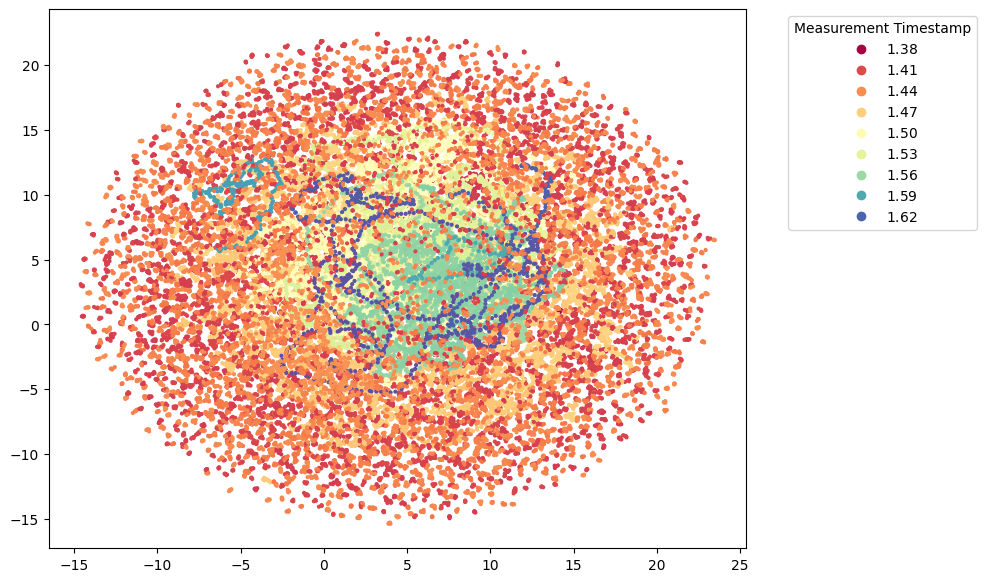

In [253]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

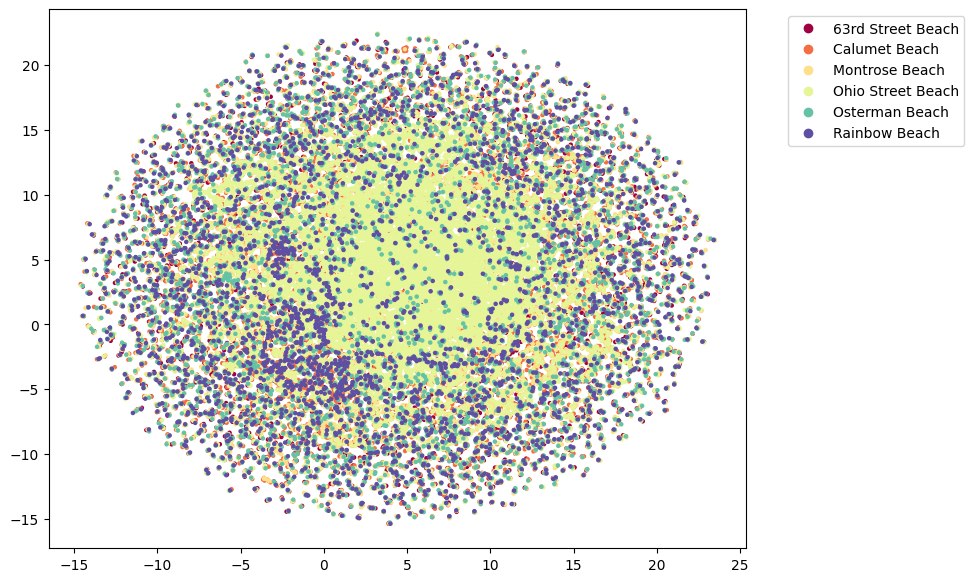

In [254]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [255]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,-0.192392,0.090013,0.127852,0.127865,-0.075177,1.379498e+09
1,0.0,1.724619,-0.039273,0.127844,0.128262,1.507155,1.402574e+09
2,0.0,-0.428332,-0.043677,0.127868,0.128341,1.507155,1.402578e+09
3,0.0,-0.605287,-0.055631,0.127852,0.127865,1.507155,1.402582e+09
4,0.0,-0.664272,-0.077965,0.127853,0.127865,1.375294,1.402585e+09
...,...,...,...,...,...,...,...
40697,5.0,-0.988690,0.542987,-7.821354,-7.821354,-7.591253,1.443668e+09
40698,5.0,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342,1.443672e+09
40699,5.0,-1.077167,0.122413,-7.821354,-7.821354,-7.063809,1.443676e+09
40700,5.0,-1.106660,11.093180,-7.821354,-7.821354,-0.866342,1.443679e+09


### Exporting the UMAP output to excel

In [256]:
# Creating the dataframe from the array umap_result
# umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])


umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [257]:
umap_result_df

,UMAP-0,UMAP-1
0,14.245481,1.101689
1,-1.203359,11.449364
2,-2.076262,-6.212393
3,-0.220622,9.031569
4,-1.977764,6.852182
...,...,...
40697,-0.053882,-0.478848
40698,0.083969,-0.426674
40699,-0.142382,-0.404029
40700,-0.054310,-0.406915


In [258]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted = pd.concat([data_sorted,measurement_timestamp_org_df,umap_result_df], axis=1)

In [259]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp,Measurement_Timestamp_Org,UMAP-0,UMAP-1
0,0.0,-0.192392,0.090013,0.127852,0.127865,-0.075177,1.379498e+09,2018-04-07 00:30:00,14.245481,1.101689
1,0.0,1.724619,-0.039273,0.127844,0.128262,1.507155,1.402574e+09,2019-06-14 19:00:00,-1.203359,11.449364
2,0.0,-0.428332,-0.043677,0.127868,0.128341,1.507155,1.402578e+09,2018-05-16 13:00:00,-2.076262,-6.212393
3,0.0,-0.605287,-0.055631,0.127852,0.127865,1.507155,1.402582e+09,2018-05-16 14:00:00,-0.220622,9.031569
4,0.0,-0.664272,-0.077965,0.127853,0.127865,1.375294,1.402585e+09,2018-06-04 09:00:00,-1.977764,6.852182
...,...,...,...,...,...,...,...,...,...,...
40697,5.0,-0.988690,0.542987,-7.821354,-7.821354,-7.591253,1.443668e+09,2015-08-24 21:00:00,-0.053882,-0.478848
40698,5.0,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342,1.443672e+09,2015-08-24 22:00:00,0.083969,-0.426674
40699,5.0,-1.077167,0.122413,-7.821354,-7.821354,-7.063809,1.443676e+09,2015-08-24 23:00:00,-0.142382,-0.404029
40700,5.0,-1.106660,11.093180,-7.821354,-7.821354,-0.866342,1.443679e+09,2015-08-23 15:00:00,-0.054310,-0.406915


In [260]:
# Exporting the csv file
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/clean_data_with_outliers.csv")

In [261]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp,Measurement_Timestamp_Org,UMAP-0,UMAP-1
0,0.0,-0.192392,0.090013,0.127852,0.127865,-0.075177,1.379498e+09,2018-04-07 00:30:00,14.245481,1.101689
1,0.0,1.724619,-0.039273,0.127844,0.128262,1.507155,1.402574e+09,2019-06-14 19:00:00,-1.203359,11.449364
2,0.0,-0.428332,-0.043677,0.127868,0.128341,1.507155,1.402578e+09,2018-05-16 13:00:00,-2.076262,-6.212393
3,0.0,-0.605287,-0.055631,0.127852,0.127865,1.507155,1.402582e+09,2018-05-16 14:00:00,-0.220622,9.031569
4,0.0,-0.664272,-0.077965,0.127853,0.127865,1.375294,1.402585e+09,2018-06-04 09:00:00,-1.977764,6.852182
...,...,...,...,...,...,...,...,...,...,...
40697,5.0,-0.988690,0.542987,-7.821354,-7.821354,-7.591253,1.443668e+09,2015-08-24 21:00:00,-0.053882,-0.478848
40698,5.0,-1.106660,-0.143080,-7.821354,-7.821354,-0.866342,1.443672e+09,2015-08-24 22:00:00,0.083969,-0.426674
40699,5.0,-1.077167,0.122413,-7.821354,-7.821354,-7.063809,1.443676e+09,2015-08-24 23:00:00,-0.142382,-0.404029
40700,5.0,-1.106660,11.093180,-7.821354,-7.821354,-0.866342,1.443679e+09,2015-08-23 15:00:00,-0.054310,-0.406915


## Inverse_transform function to approximate the original data points


In [262]:
approximated_data = reducer.inverse_transform(umap_result)

In [263]:
inverted_data = pd.DataFrame(data=approximated_data)
inverted_data

,0,1,2,3,4,5,6
0,2.284080,0.313760,-0.005815,0.127871,0.128023,-0.508251,1.420657e+09
1,2.142739,1.277984,-0.089779,0.127849,0.127865,0.640708,1.451322e+09
2,2.142032,-0.217887,0.035782,0.127858,0.127899,0.377005,1.404357e+09
3,1.999956,-0.226067,-0.028711,0.127856,0.127876,-0.169232,1.445447e+09
4,2.285536,-0.272509,-0.050813,0.127850,0.127808,0.866654,1.407582e+09
...,...,...,...,...,...,...,...
40697,3.714407,-0.356766,1.859399,-4.414854,-4.414850,-2.298273,1.473497e+09
40698,3.714153,0.165822,1.569137,-3.278517,-3.278521,-1.562881,1.495510e+09
40699,3.142895,-0.188157,1.542309,-2.143394,-2.143465,-0.904089,1.473086e+09
40700,3.285979,-0.087140,1.623357,-3.279538,-3.279563,-2.411277,1.469134e+09


In [264]:
inverted_data.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/inverted_csv.csv")